In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
#data = pd.read_csv(r"C:\Users\Raghavendra N\OneDrive\Official\Datasets\ML Datasets\Marketing_train.csv",
#                   na_values = "unknown")
data = pd.read_csv("/Users/rnr/OneDrive/Official/Datasets/ML Datasets/Marketing_train.csv",
                   na_values = "unknown")
data.head()

custAge   profession   marital          schooling default housing loan  \
0     55.0       admin.    single  university.degree     NaN      no   no   
1      NaN  blue-collar   married                NaN      no      no   no   
2     42.0   technician   married        high.school      no      no   no   
3     55.0   management  divorced                NaN     NaN     yes  yes   
4      NaN       admin.  divorced  university.degree      no     yes   no   

     contact month day_of_week  ...  previous     poutcome  emp.var.rate  \
0   cellular   nov         mon  ...         0  nonexistent          -0.1   
1   cellular   jul         mon  ...         0  nonexistent           1.4   
2  telephone   may         mon  ...         0  nonexistent           1.1   
3   cellular   jul         wed  ...         0  nonexistent           1.4   
4   cellular   may         tue  ...         1      failure          -1.8   

  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  pmonths  pastEmail  \
0         93.200          -42.0      4.191       5195.8    999.0          0   
1         93.918          -42.7      4.960       5228.1    999.0          0   
2         93.994          -36.4      4.857       5191.0    999.0          0   
3         93.918          -42.7      4.962       5228.1    999.0          0   
4         92.893          -46.2      1.291       5099.1    999.0          1   

   responded  
0         no  
1         no  
2         no  
3         no  
4         no  

[5 rows x 22 columns]

In [131]:
data.shape

(7414, 22)

In [132]:
data.describe()

custAge     campaign        pdays     previous  emp.var.rate  \
count  5610.000000  7414.000000  7414.000000  7414.000000   7414.000000   
mean     40.009804     2.518344   960.024548     0.184111      0.052091   
std      10.574616     2.695055   192.845029     0.516775      1.568399   
min      18.000000     1.000000     0.000000     0.000000     -3.400000   
25%      32.000000     1.000000   999.000000     0.000000     -1.800000   
50%      38.000000     2.000000   999.000000     0.000000      1.100000   
75%      47.000000     3.000000   999.000000     0.000000      1.400000   
max      94.000000    40.000000   999.000000     6.000000      1.400000   

       cons.price.idx  cons.conf.idx    euribor3m  nr.employed      pmonths  \
count     7414.000000    7414.000000  7414.000000  7414.000000  7414.000000   
mean        93.570708     -40.561316     3.583141  5165.224251   959.797028   
std          0.578345       4.649800     1.744865    73.108669   193.969418   
min         92.201000     -50.800000     0.634000  4963.600000     0.000000   
25%         93.075000     -42.700000     1.334000  5099.100000   999.000000   
50%         93.444000     -41.800000     4.857000  5191.000000   999.000000   
75%         93.994000     -36.400000     4.961000  5228.100000   999.000000   
max         94.767000     -26.900000     5.045000  5228.100000   999.000000   

         pastEmail  
count  7414.000000  
mean      0.361883  
std       1.261668  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max      18.000000

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5610 non-null   float64
 1   profession      7353 non-null   object 
 2   marital         7406 non-null   object 
 3   schooling       5028 non-null   object 
 4   default         5982 non-null   object 
 5   housing         7246 non-null   object 
 6   loan            7246 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     6703 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m       7414 non-null   f

## Data Cleaning

In [134]:
#Checking for unique values in categorical columns
for i in data.columns:
    if data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',data[i].unique())
        print()

profession: 
 ['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' nan 'self-employed' 'retired' 'student' 'entrepreneur']

marital: 
 ['single' 'married' 'divorced' nan]

schooling: 
 ['university.degree' nan 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

default: 
 [nan 'no' 'yes']

housing: 
 ['no' 'yes' nan]

loan: 
 ['no' 'yes' nan]

contact: 
 ['cellular' 'telephone']

month: 
 ['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']

day_of_week: 
 ['mon' 'wed' 'tue' 'fri' 'thu' nan]

poutcome: 
 ['nonexistent' 'failure' 'success']

responded: 
 ['no' 'yes']



In [135]:
#Checking the total missing values present in each feature of the data
data.isnull().sum()

custAge           1804
profession          61
marital              8
schooling         2386
default           1432
housing            168
loan               168
contact              0
month                0
day_of_week        711
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [136]:
# Mean Imputation Missing Values for Numeric Variables
data["custAge"] = data["custAge"].fillna(data["custAge"].mean())

In [137]:
# Mode Imputation of Missing Values for Categorical Variables
data["schooling"] = data["schooling"].fillna(data["schooling"].mode()[0])
data["day_of_week"] = data["day_of_week"].fillna(data["day_of_week"].mode()[0])
data["default"] = data["default"].fillna(data["default"].mode()[0])
data["loan"] = data["loan"].fillna(data["loan"].mode()[0])
data["profession"] = data["profession"].fillna(data["profession"].mode()[0])
data["housing"] = data["housing"].fillna(data["housing"].mode()[0])
data["marital"] = data["marital"].fillna(data["marital"].mode()[0])

In [138]:
data.isnull().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

In [139]:
#Checking for unique values in categorical columns
for i in data.columns:
    if data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',data[i].unique())
        print()

profession: 
 ['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' 'self-employed' 'retired' 'student' 'entrepreneur']

marital: 
 ['single' 'married' 'divorced']

schooling: 
 ['university.degree' 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

default: 
 ['no' 'yes']

housing: 
 ['no' 'yes']

loan: 
 ['no' 'yes']

contact: 
 ['cellular' 'telephone']

month: 
 ['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']

day_of_week: 
 ['mon' 'wed' 'tue' 'fri' 'thu']

poutcome: 
 ['nonexistent' 'failure' 'success']

responded: 
 ['no' 'yes']



## univariate analysis of Target Variable

In [140]:
data['responded'].value_counts()

no     6574
yes     840
Name: responded, dtype: int64

In [141]:
#Checking the distribution of target variable in terms of percentage
data['responded'].value_counts(normalize=True)

no     0.886701
yes    0.113299
Name: responded, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='responded', ylabel='count'>

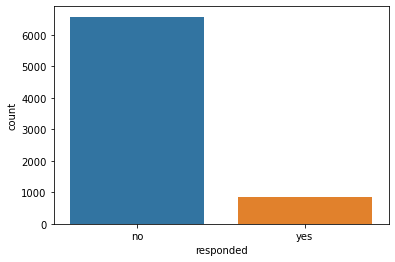

In [142]:
sns.countplot(data['responded'])

### The Above graph clearly shows that the customers who didnt respond to the campaign are more compared to the customers who responded to the campaign. Hence we say that this is an imbalanced class classification problem

In [143]:
#Checking the distribution of profession column
data['profession'].value_counts(normalize=True)

admin.           0.262476
blue-collar      0.224575
technician       0.163475
services         0.096979
management       0.072296
retired          0.041408
entrepreneur     0.037092
self-employed    0.033450
housemaid        0.025223
unemployed       0.023334
student          0.019692
Name: profession, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x360 with 0 Axes>

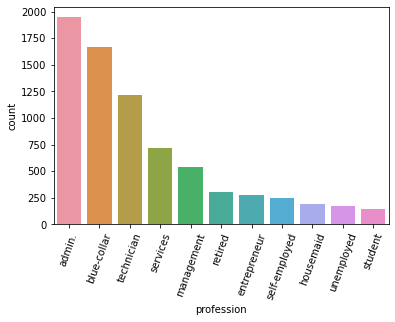

<Figure size 720x360 with 0 Axes>

In [144]:
chart = sns.countplot(data['profession'], order = data['profession'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x360 with 0 Axes>

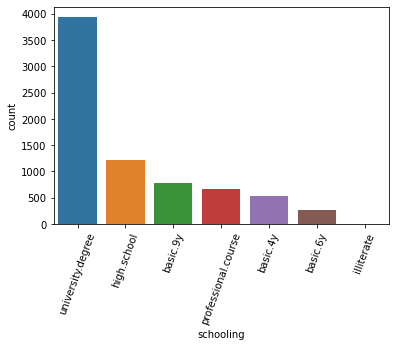

<Figure size 720x360 with 0 Axes>

In [145]:
chart = sns.countplot(data['schooling'],order = data['schooling'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x360 with 0 Axes>

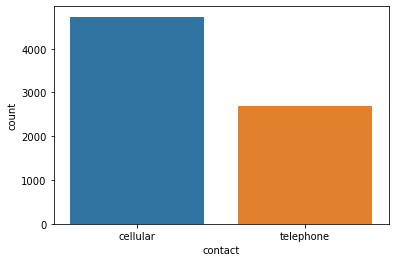

<Figure size 720x360 with 0 Axes>

In [146]:
chart = sns.countplot(data['contact'],order = data['contact'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=0)
plt.figure(figsize=(10,5))

## Outlier analysis

In [147]:
#Numerical variables list
#NumVarList = ["custAge","campaign","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","pastEmail]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='custAge'>

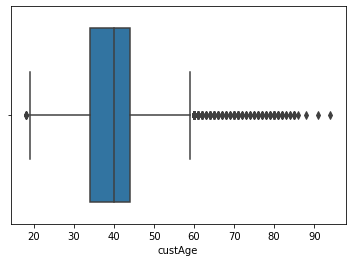

In [148]:
sns.boxplot(data.custAge)

### Outliers exist in the variable custAge. Also median age of the customers in the dataset in 40. Majority of the customers in the dataset lie in the agegroup of 35+ years to 45 years

In [149]:
#Count of outliers
data[data.custAge>60]['custAge'].count()
#data[data.custAge>60].shape[0]

141

In [150]:
data[data.custAge<20]['custAge'].count()

8

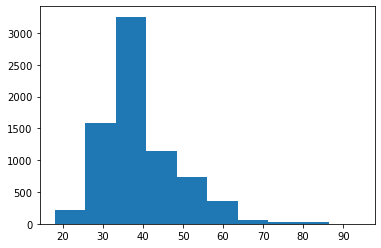

In [151]:
ax = plt.hist(data.custAge,bins=10)

### The histogram clearly shows that the custAge variable is positively skewed. The trailing values near to 90 indicates the presence of outliers
### Also senior citizens above 60 are more pone to invest in Fixed deposits

# Bivariate Analysis

In [152]:
#Checking how many responded when the contact was celluar(mobile phone)
sns.countplot(y=data.contact,hue=data.responded)

<AxesSubplot:xlabel='count', ylabel='contact'>

In [153]:
data.contact.value_counts(normalize=True)*100

cellular     63.811708
telephone    36.188292
Name: contact, dtype: float64

### Customers responded to campaign more when the contact was through mobile phone. Today more people tend to have mobile phones than landlines

In [154]:
#checking how loan is affecting the target

In [155]:
sns.countplot(y=data.loan,hue=data.responded)

<AxesSubplot:xlabel='count', ylabel='loan'>

### customers who did not have loan responded to the campaign more than that of customers who had loan

<AxesSubplot:xlabel='count', ylabel='month'>

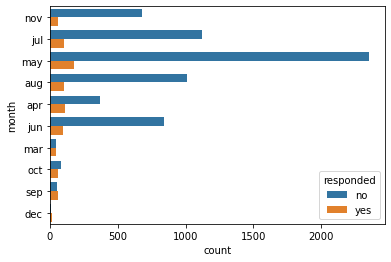

In [156]:
# try other categoral columns wrt target
#sns.countplot(y=data.day_of_week,hue=data.responded)
sns.countplot(y=data.month,hue=data.responded)
#sns.countplot(y=data.profession,hue=data.responded)
#sns.countplot(y=data.schooling,hue=data.responded)
#sns.countplot(y=data.contact,hue=data.responded)
#sns.countplot(y=data.poutcome,hue=data.responded)

In [157]:
data.month.value_counts(normalize=True)*100

may    34.111141
jul    16.576747
aug    14.998651
jun    12.665228
nov     9.994605
apr     6.568654
oct     1.955759
sep     1.510656
mar     1.254384
dec     0.364176
Name: month, dtype: float64

### Conclusion of Bi-variate analysis
### We can say that there is a better response when:
    - Contacted on Monday
    - During the month of May
    - When people are married
    - When they dont have a loan
    - Profession is Admin
    - Education is University degree
    - Contacted through mobile
    - They are new customers - previous outcome was non-existant

### Calculate the correlation for the numeric variable

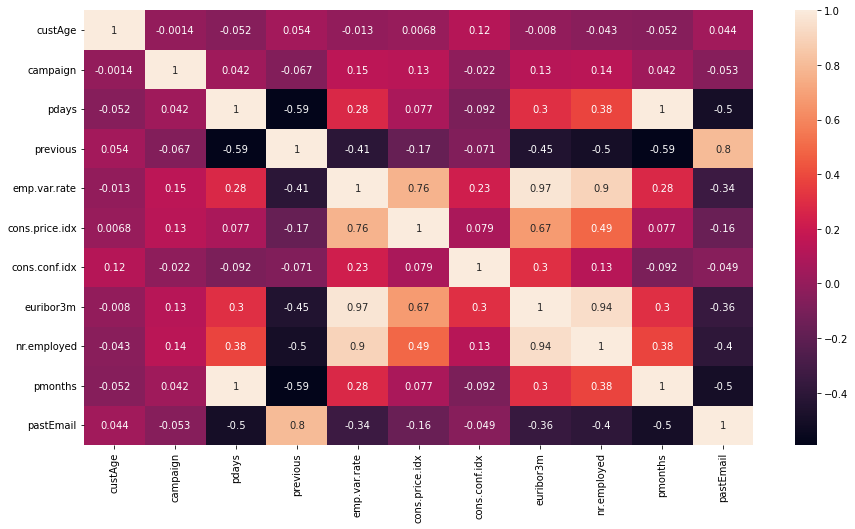

In [158]:
#Calculate the correlation for the dataset
corr = data.corr()

#Setting the size of the figure
plt.figure(figsize =(15,8))

#Plot the correlation using heatmap
ax = sns.heatmap(corr, annot=True)

### If you look at the data, pmonths and pdays are one and the same, hence dropping one of the columns

In [159]:
data.drop(axis=1,columns=['pmonths'],inplace=True)

In [160]:
data.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pastEmail', 'responded'],
      dtype='object')

### Encoding the Categoral variables

In [161]:
# Ordinal Columns to perform Label Encoding
columns_to_le = ["profession","marital","schooling","contact","month","day_of_week","poutcome",
                "responded"]
#Label Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in columns_to_le:
    data[col] = le.fit_transform(data[col])

In [162]:
#!pip install category_encoders --user
#!pip install statsmodels==0.10.0rc2 --pre --user

In [163]:
columns_to_oe = ["default","housing","loan"]
#Label Encoding the Nominal categorical columns
from category_encoders import OneHotEncoder
oe = OneHotEncoder(cols = columns_to_oe)
data = oe.fit_transform(data)

In [164]:
data.head()

custAge  profession  marital  schooling  default_1  default_2  housing_1  \
0  55.000000           0        2          6          1          0          1   
1  40.009804           1        1          6          1          0          1   
2  42.000000           9        1          3          1          0          1   
3  55.000000           4        0          6          1          0          0   
4  40.009804           0        0          6          1          0          0   

   housing_2  loan_1  loan_2  ...  pdays  previous  poutcome  emp.var.rate  \
0          0       1       0  ...    999         0         1          -0.1   
1          0       1       0  ...    999         0         1           1.4   
2          0       1       0  ...    999         0         1           1.1   
3          1       0       1  ...    999         0         1           1.4   
4          1       1       0  ...    999         1         0          -1.8   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  pastEmail  responded  
0          93.200          -42.0      4.191       5195.8          0          0  
1          93.918          -42.7      4.960       5228.1          0          0  
2          93.994          -36.4      4.857       5191.0          0          0  
3          93.918          -42.7      4.962       5228.1          0          0  
4          92.893          -46.2      1.291       5099.1          1          0  

[5 rows x 24 columns]

In [165]:
#pdays has a value 999 when not contacted before
# It is a very high value and impacts the analysis, lets replace it with -1

data['pdays'].replace(999,-1,inplace=True)
data.head(5)

custAge  profession  marital  schooling  default_1  default_2  housing_1  \
0  55.000000           0        2          6          1          0          1   
1  40.009804           1        1          6          1          0          1   
2  42.000000           9        1          3          1          0          1   
3  55.000000           4        0          6          1          0          0   
4  40.009804           0        0          6          1          0          0   

   housing_2  loan_1  loan_2  ...  pdays  previous  poutcome  emp.var.rate  \
0          0       1       0  ...     -1         0         1          -0.1   
1          0       1       0  ...     -1         0         1           1.4   
2          0       1       0  ...     -1         0         1           1.1   
3          1       0       1  ...     -1         0         1           1.4   
4          1       1       0  ...     -1         1         0          -1.8   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  pastEmail  responded  
0          93.200          -42.0      4.191       5195.8          0          0  
1          93.918          -42.7      4.960       5228.1          0          0  
2          93.994          -36.4      4.857       5191.0          0          0  
3          93.918          -42.7      4.962       5228.1          0          0  
4          92.893          -46.2      1.291       5099.1          1          0  

[5 rows x 24 columns]

In [166]:
#Splitting X and y
X= data.drop("responded",axis=1)
y = data["responded"]

In [167]:
data.shape

(7414, 24)

In [168]:
#Save numerical columns in a list
cnames = ["custAge","campaign","pdays","previous","emp.var.rate","cons.price.idx",
         "cons.conf.idx","euribor3m","nr.employed","pastEmail"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in cnames:
    X[col] = sc.fit_transform(X[[col]])

In [169]:
X.shape

(7414, 23)

In [170]:
X.head()

custAge  profession  marital  schooling  default_1  default_2  \
0  1.629770e+00           0        2          6          1          0   
1  7.725190e-16           1        1          6          1          0   
2  2.163789e-01           9        1          3          1          0   
3  1.629770e+00           4        0          6          1          0   
4  7.725190e-16           0        0          6          1          0   

   housing_1  housing_2  loan_1  loan_2  ...  campaign     pdays  previous  \
0          1          0       1       0  ... -0.563419 -0.178638 -0.356294   
1          1          0       1       0  ... -0.563419 -0.178638 -0.356294   
2          1          0       1       0  ... -0.563419 -0.178638 -0.356294   
3          0          1       0       1  ... -0.192344 -0.178638 -0.356294   
4          0          1       1       0  ...  0.920881 -0.178638  1.578915   

   poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0         1     -0.096978       -0.641025      -0.309429   0.348394   
1         1      0.859475        0.600533      -0.459983   0.789146   
2         1      0.668184        0.731952       0.895006   0.730111   
3         1      0.859475        0.600533      -0.459983   0.790292   
4         0     -1.180959       -1.171886      -1.212754  -1.313738   

   nr.employed  pastEmail  
0     0.418252  -0.286848  
1     0.860089  -0.286848  
2     0.352591  -0.286848  
3     0.860089  -0.286848  
4    -0.904526   0.505806  

[5 rows x 23 columns]

In [171]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         7414 non-null   float64
 1   profession      7414 non-null   int64  
 2   marital         7414 non-null   int64  
 3   schooling       7414 non-null   int64  
 4   default_1       7414 non-null   int64  
 5   default_2       7414 non-null   int64  
 6   housing_1       7414 non-null   int64  
 7   housing_2       7414 non-null   int64  
 8   loan_1          7414 non-null   int64  
 9   loan_2          7414 non-null   int64  
 10  contact         7414 non-null   int64  
 11  month           7414 non-null   int64  
 12  day_of_week     7414 non-null   int64  
 13  campaign        7414 non-null   float64
 14  pdays           7414 non-null   float64
 15  previous        7414 non-null   float64
 16  poutcome        7414 non-null   int64  
 17  emp.var.rate    7414 non-null   f

# Splitting the Data into train test

In [172]:
from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, 
                                                 random_state = 0, stratify = y)

In [45]:
n_train = len(y_train)
n_test = len(y_test)

In [46]:
print('value counts of the labels in train ')
print(len(y_train[y_train==0])/n_train)
print(len(y_train[y_train==1])/n_train)

value counts of the labels in train 
0.8866970156803238
0.11330298431967628


In [47]:
print('value counts of the labels in test ')
print(len(y_test[y_test==0])/n_test)
print(len(y_test[y_test==1])/n_test)

value counts of the labels in test 
0.8867161159811193
0.11328388401888065


# Fitting a logistic regression model

In [173]:
from sklearn.linear_model import LogisticRegression
lregr = LogisticRegression()
lregr.fit(X_train,y_train)

/Users/rnr/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [174]:
y_predict_logreg = lregr.predict(X_test)

In [180]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, roc_curve, auc
acc = accuracy_score(y_test,y_predict_logreg)
acc

0.8954821308159137

In [179]:
f1 = f1_score(y_test,y_predict_logreg)
f1

0.304932735426009

In [177]:
confusion_matrix(y_test,y_predict_logreg)

array([[1294,   21],
       [ 134,   34]])

In [178]:
probs = lregr.predict_proba(X_test)
prob_positive = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test,prob_positive)
roc_auc = auc(fpr,tpr)
roc_auc

0.8067105739634257

In [193]:
scores_df = pd.DataFrame([[acc,f1,roc_auc]], index=['Logistic Regression'], columns=['Accuracy','F1-Score','ROC-AUC'])
scores_df

Accuracy  F1-Score   ROC-AUC
Logistic Regression  0.895482  0.304933  0.806711

In [54]:
plt.title("receiver Operating Charecteristc")
plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.show()

# Fitting a Decision tree model

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
dectree = DecisionTreeClassifier(random_state = 0)
dectree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [195]:
y_predict_dtree = dectree.predict(X_test)

In [200]:
acc = accuracy_score(y_test,y_predict_dtree)
acc

0.8361429534726905

In [201]:
f1 = f1_score(y_test,y_predict_dtree)
f1

0.33424657534246577

In [202]:
probs = dectree.predict_proba(X_test)
prob_positive = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test,prob_positive)
roc_auc = auc(fpr,tpr)
roc_auc

0.6286257468766975

In [208]:
scores_df.loc['Decision Tree'] = [acc,f1,roc_auc]
scores_df

Accuracy  F1-Score   ROC-AUC
Logistic Regression  0.895482  0.304933  0.806711
Decision Tree        0.836143  0.334247  0.628626

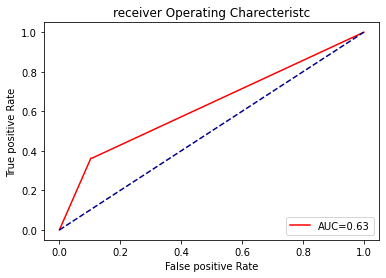

In [61]:
plt.title("receiver Operating Charecteristc")
plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.show()

# Fitting a Random forest model

In [209]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [210]:
y_pred = rf.predict(X_test)

In [215]:
acc = accuracy_score(y_test,y_pred)
acc

0.8954821308159137

In [214]:
f1 = f1_score(y_test,y_pred)
f1

0.36734693877551017

In [66]:
confusion_matrix(y_test,y_pred)

array([[1283,   32],
       [ 123,   45]])

In [216]:
probs = rf.predict_proba(X_test)
prob_positive = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test,prob_positive)
roc_auc = auc(fpr,tpr)
roc_auc

0.7794065725149375

In [217]:
scores_df.loc['Random Forest'] = [acc,f1,roc_auc]
scores_df

Accuracy  F1-Score   ROC-AUC
Logistic Regression  0.895482  0.304933  0.806711
Decision Tree        0.836143  0.334247  0.628626
Random Forest        0.895482  0.367347  0.779407

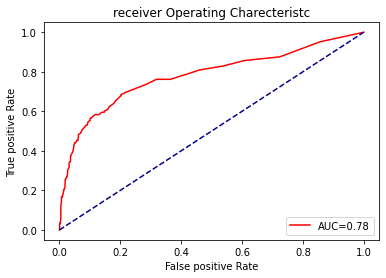

In [68]:
plt.title("receiver Operating Charecteristc")
plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.show()

### Stratified K-fold

In [69]:
X = X.to_numpy()

For imbalanced class problem, we need to divide the samples of minority and majority classes into appropriate ratio of train set and test set, hence using Stratified k-fold

In [70]:
from sklearn.model_selection import StratifiedKFold

strata_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scores=[]
f1_list = []
auc_list = []
# enumerate the splits and summarize the distributions
for train_ix, test_ix in strata_kfold.split(X, y):
    # select rows
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
    #Build the model each sample using Random forest classifier
    model = rf.fit(train_X, train_y)
    y_predict=rf.predict(test_X)
    scores.append(model.score(test_X,test_y))
    
    #code to compute f1 score for each random sample
    f_score = f1_score(test_y,y_predict)
    #append f1 score into the list auc_list
    f1_list.append(f_score)
    
    #Write a code to compute the area under the curve for each sample
    probs = rf.predict_proba(test_X)
    prob_positive = probs[:,1]
    fpr, tpr, threshold = roc_curve(test_y,prob_positive)
    auc_list.append(auc(fpr,tpr))

Train: 0=5259, 1=672, Test: 0=1315, 1=168
Train: 0=5259, 1=672, Test: 0=1315, 1=168
Train: 0=5259, 1=672, Test: 0=1315, 1=168
Train: 0=5259, 1=672, Test: 0=1315, 1=168
Train: 0=5260, 1=672, Test: 0=1314, 1=168


In [71]:
print('Accuracy Scores from each prediction:', scores)
print('\nAverage statified k-fold accuracy score:', np.mean(scores))   
print('\nF1 Scores from each prediction:', f1_list)
print('\nAverage statified k-fold F1 score:', np.mean(f1_list))   
print('\nAUC from each prediction:', auc_list)
print('\nAverage statified k-fold AUC:', np.mean(auc_list))   

Accuracy Scores from each prediction: [0.9015509103169251, 0.8954821308159137, 0.8927848954821308, 0.8941335131490222, 0.8940620782726046]

Average statified k-fold accuracy score: 0.8956027056073192

F1 Scores from each prediction: [0.416, 0.3775100401606426, 0.3510204081632653, 0.39846743295019155, 0.3794466403162055]

Average statified k-fold F1 score: 0.384488904318061

AUC from each prediction: [0.7985809342748506, 0.7455549520188304, 0.7411959080210031, 0.7720713380409198, 0.758160741465536]

Average statified k-fold AUC: 0.763112774764228


# Sampling Techniques

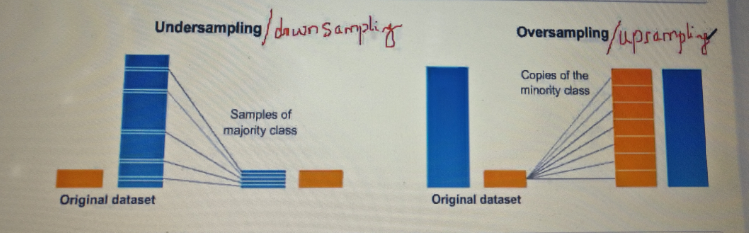

### Upsampling

In [72]:
print(data.responded.value_counts())

0    6574
1     840
Name: responded, dtype: int64


In [73]:
df_majority = data[data.responded==0]
df_minority = data[data.responded==1]

In [74]:
import sklearn.utils as ut
#upsample minority class
df_minority_upsampled = ut.resample(df_minority,
                         replace = True,
                         n_samples=6574,
                         random_state=1)

In [75]:
print(df_majority.shape)
print(df_minority_upsampled.shape)

(6574, 24)
(6574, 24)


In [76]:
#combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [77]:
print(df_upsampled.responded.value_counts())

0    6574
1    6574
Name: responded, dtype: int64


In [78]:
df_upsampled.shape

(13148, 24)

In [79]:
#Splitting X and y
X_upsampled= df_upsampled.drop("responded",axis=1)
y_upsampled = df_upsampled["responded"]

In [80]:
#Save numerical columns in a list
cnames = ["custAge","campaign","pdays","previous","emp.var.rate","cons.price.idx",
         "cons.conf.idx","euribor3m","nr.employed","pastEmail"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in cnames:
    X_upsampled[col] = sc.fit_transform(X_upsampled[[col]])

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 0)

In [82]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [83]:
rf.score(X_test,y_test)

0.9714828897338403

In [84]:
f1_score(y_test,rf.predict(X_test))

0.972992437882607

In [85]:
cm  = confusion_matrix(y_test,rf.predict(X_test))
cm

array([[1204,   74],
       [   1, 1351]])

In [86]:
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [87]:
Precision = (TP/(TP+FP))
recall = (TP/(FN+TP))
f1score = 2*(Precision*recall)/(Precision+recall)
print(Precision,recall,f1score)

0.9480701754385965 0.9992603550295858 0.972992437882607


In [88]:
f1_score(y_test,rf.predict(X_test))

0.972992437882607

In [89]:
probs = rf.predict_proba(X_test)
prob_positive = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test,prob_positive)
roc_auc = auc(fpr,tpr)
roc_auc

0.9980956167643599

In [90]:
plt.title("receiver Operating Charecteristc")
plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.show()

### Downsampling

In [91]:
df_majority_downsampled = ut.resample(df_majority,
                                     replace=False,
                                     n_samples=840,
                                     random_state=1)

In [92]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

In [93]:
df_downsampled.responded.value_counts()

0    840
1    840
Name: responded, dtype: int64

In [94]:
#Splitting X and y
X_downsampled= df_downsampled.drop("responded",axis=1)
y_downsampled = df_downsampled["responded"]

In [95]:
#Save numerical columns in a list
cnames = ["custAge","campaign","pdays","previous","emp.var.rate","cons.price.idx",
         "cons.conf.idx","euribor3m","nr.employed","pastEmail"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in cnames:
    X_downsampled[col] = sc.fit_transform(X_downsampled[[col]])

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X_downsampled,y_downsampled,test_size = 0.2, random_state = 0)

In [97]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [98]:
rf.score(X_test,y_test)

0.7261904761904762

In [99]:
cm  = confusion_matrix(y_test,rf.predict(X_test))
cm

array([[130,  37],
       [ 55, 114]])

In [100]:
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [101]:
Precision = (TP/(TP+FP))
recall = (TP/(FN+TP))
f1score = 2*(Precision*recall)/(Precision+recall)
print(Precision,recall,f1score)

0.7549668874172185 0.6745562130177515 0.7124999999999999


In [102]:
f1_score(y_test,rf.predict(X_test))

0.7124999999999999

In [103]:
probs = rf.predict_proba(X_test)
prob_positive = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test,prob_positive)
roc_auc = auc(fpr,tpr)
roc_auc

0.7686284236261206

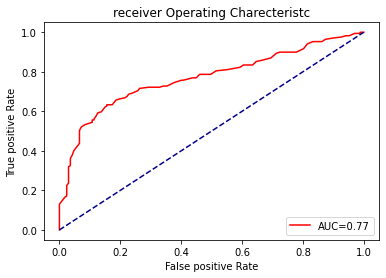

In [104]:
plt.title("receiver Operating Charecteristc")
plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.show()

#### Downsampling results in training with insufficient data which could be the reason for the decrease in performance

### SMOTE - Synthetic minority over sampling technique

In [105]:
#ref : https://jair.org/index.php/jair/article/view/10302/24590

 - The oversampling or the upsampling technique solves the imbalance class problem to a greater extent but does not add any additional information to the model, since the records of the minority class are just duplicated to match to the majority class
 - An imporvement to this oversampling technique is SMOTE where we synthesize new samples from the minority class
 - SMOTE works by selecting samples that are very close in the feature space by drawing a line between the samples of the feature space and drawing a new sample at a point along that line

In [106]:
#!pip install --upgrade pip --user

In [107]:
#!pip install imblearn --user

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
print(data.responded.value_counts())

0    6574
1     840
Name: responded, dtype: int64


In [114]:
smt = SMOTE(random_state=0)
#X, y = smt.fit_sample(X, y)
X, y = smt.fit_resample(X, y)

In [115]:
y.value_counts()

0    6574
1    6574
Name: responded, dtype: int64

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0, stratify = y)

In [117]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [118]:
rf.score(X_test,y_test)

0.9482889733840304

In [119]:
cm  = confusion_matrix(y_test,rf.predict(X_test))
cm

array([[1265,   50],
       [  86, 1229]])

In [120]:
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [121]:
Precision = (TP/(TP+FP))
recall = (TP/(FN+TP))
f1score = 2*(Precision*recall)/(Precision+recall)
print(Precision,recall,f1score)

0.9609069585613761 0.9346007604562737 0.9475713184271396


In [122]:
f1_score(y_test,rf.predict(X_test))

0.9475713184271396

In [123]:
probs = rf.predict_proba(X_test)
prob_positive = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test,prob_positive)
roc_auc = auc(fpr,tpr)
roc_auc

0.9828437594876318